In [175]:
import numpy as np
import random
import re
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as LA
import scipy.io as sio   ## for loading octave matlab file
import math
import numpy.linalg as linalg

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy.optimize #fmin_cg 

In [176]:
'''
 load the dataset ex8 movies.mat, providing the variables Y and R in your
 environment. The matrix Y (a num movies×num users matrix) stores the
 ratings y(i,j) (from 1 to 5). The matrix R is an binary-valued indicator
 matrix, where R(i,j) = 1 if user j gave a rating to movie i, and R(i,j) = 0 
 otherwise
 Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies on 
  943 users

  R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a
  rating to movie i

'''
# The objective of collaborative ﬁltering is to predict movie ratings for 
#the movies that users have not yet rated, that is, the entries with
#R(i,j) = 0. This will allow us to recommend the movies with the highest
#predicted ratings to the user. 
mat_contents = sio.loadmat(r"C:\Users\user\Documents\Machine learning\machine-learning-ex8\ex8\ex8_movies.mat")

# ratings data stored in arrays Y
Y=mat_contents['Y']

#binary value indicator matrix R
R=mat_contents['R']


In [177]:
#From the matrix, we can compute statistics like average rating.
# Method 1
avg_rating = sum(Y[0])/sum(Y[0]!=0)
print('avg_rating = ',avg_rating)

# Method 2
a=np.where(Y[0]!=0)
avg_rating = Y[0][a].mean()
print('avg_rating = ',avg_rating)

avg_rating =  3.8783185840707963
avg_rating =  3.8783185840707963


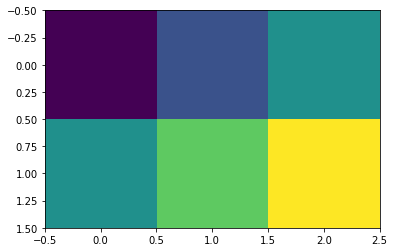

In [178]:
## just a visualization of how imshow works each value is assigned a pixel and every time the same digit is 
## represented with that same color
a=np.array([[1, 2,3], [3, 4,5]])
plt.imshow(a,aspect='auto')

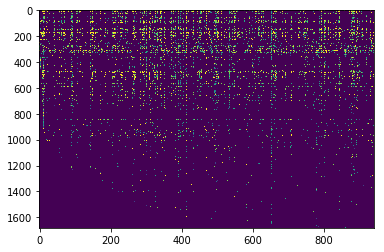

In [179]:
#We can "visualize" the ratings matrix by plotting it with imshow
plt.imshow(Y,aspect='auto')


### Collaborative Filtering Cost Function

In [180]:
'''
You will now implement the cost function for collaborative filtering.
%  To help you debug your cost function, we have included set of weights
%  that we trained on that. Specifically, you should complete the code in 
%  cofiCostFunc.m to return J.
%  Load pre-trained weights (X, Theta, num_users, num_movies, num_features)
load ('ex8_movieParams.mat');
'''
pre_trained_wts = sio.loadmat(r"C:\Users\user\Documents\Machine learning\machine-learning-ex8\ex8\ex8_movieParams.mat")
pre_trained_wts

#data stored in arrays X
X = pre_trained_wts['X']
Theta= pre_trained_wts['Theta']
num_users = pre_trained_wts['num_users']
num_movies = pre_trained_wts['num_movies']
num_features = pre_trained_wts['num_features']


In [181]:
#Reduce the data set size so that this runs faster
num_users = 4
num_movies = 5
num_features = 3

smallX = X[0:num_movies, 0:num_features]
smallTheta = Theta[0:num_users, 0:num_features]
smallY = Y[0:num_movies, 0:num_users]
smallR = R[0:num_movies, 0:num_users]


In [182]:
'''
Collaborative filtering cost function
%   [J, grad] = COFICOSTFUNC(params, Y, R, num_users, num_movies, ...
%   num_features, lambda) returns the cost and gradient for the
%   collaborative filtering problem.
% Unfold the U and W matrices from params
'''
def cofiCostFunc(params, Y, R, num_users, num_movies,num_features, Lambda):
    
    #Unfold the X and Theta matrices from params
    X = params[0:num_movies*num_features].reshape(num_movies,num_features)
    Theta = params[num_movies*num_features:].reshape(num_users,num_features)

    #You need to return the following values correctly
    J = 0
    X_grad = np.zeros((X.shape))
    Theta_grad = np.zeros((Theta.shape))
    
    #Compute the cost function and gradient for collaborative filtering.
    # this is a vectorized implementation of this cost function 
    M = (((X.dot(Theta.T))-Y)**2)/2   
    '''
  np.multipley(M,R) will do an element-wise multiplication between M and R; since R only has elements with values 
  either 0 or 1, this has the eﬀect of setting the elements of M to 0 only when the corresponding value in R is 0.
  Hence, sum(sum(R.*M)) is the sum of all the elements of M for which the corresponding element in R equals 1.
'''   
    J = sum(sum(np.multiply(M,R)))    # you should be accumulating the cost for user j and movie i only if R(i,j) = 1.
   
    regterm1 = (sum(sum(Theta**2)))
    regterm2 = (sum(sum(X**2)))
    
    J = J + (Lambda/2)*(regterm1 + regterm2) # add regularization to your original computations of the cost function, J
    
    diff = (( np.multiply(X.dot(Theta.T),R) )-Y)
    
    X_grad = diff.dot(Theta) + Lambda*X
    Theta_grad = (diff.T).dot(X) + Lambda*Theta
    grad = np.hstack((X_grad[:].flatten(),Theta_grad[:].flatten() )) 
    return J,grad


In [183]:
params = np.hstack((smallX[:].flatten(),smallTheta[:].flatten() ))   ## unrolling the parameters

In [184]:
J,grad = cofiCostFunc(params, smallY, smallR, num_users, num_movies,num_features, 0)
print('the cost at loaded parameters at lambda = 0 is',J)
print('the unrolled gradient at loaded parameters at lambda = 0 are',grad)
print()
J,grad = cofiCostFunc(params, smallY, smallR, num_users, num_movies,num_features, 1.5)
print('the cost at loaded parameters at lambda = 1.5 is',J)
print('the unrolled gradient at loaded parameters at lambda = 1.5 are',grad)


the cost at loaded parameters at lambda = 0 is 22.22460372568567
the unrolled gradient at loaded parameters at lambda = 0 are [ -2.52899165   7.57570308  -1.89979026  -0.56819597   3.35265031
  -0.52339845  -0.83240713   4.91163297  -0.76677878  -0.38358278
   2.26333698  -0.35334048  -0.80378006   4.74271842  -0.74040871
 -10.5680202    4.62776019  -7.16004443  -3.05099006   1.16441367
  -3.47410789   0.           0.           0.           0.
   0.           0.        ]

the cost at loaded parameters at lambda = 1.5 is 31.344056244274213
the unrolled gradient at loaded parameters at lambda = 1.5 are [ -0.95596339   6.97535514  -0.10861109   0.60308088   2.77421145
   0.25839822   0.12985616   4.0898522   -0.89247334   0.29684395
   1.06300933   0.66738144   0.60252677   4.90185327  -0.19747928
 -10.13985478   2.10136256  -6.76563628  -2.29347024   0.48244098
  -2.99791422  -0.64787484  -0.71820673   1.27006666   1.09289758
  -0.40784086   0.49026541]


In [185]:

'''
This function Computes the gradient using "finite differences"
%and gives us a numerical estimate of the gradient.
%   It computes the numerical
%   gradient of the function J around theta. Calling y = Jcost(theta) should
%   return the function value at theta.
  The following code implements numerical gradient checking, and 
%        returns the numerical gradient.It sets numgrad(i) to (a numerical 
%        approximation of) the partial derivative of J with respect to the 
%        i-th input argument, evaluated at theta. (i.e., numgrad(i) should 
%        be the (approximately) the partial derivative of J with respect 
%        to theta(i).)
'''
def computeNumericalGradient(Jcost,XTheta_params):
    numgrad = np.zeros((XTheta_params.shape))
    perturb = np.zeros((XTheta_params.shape))
    e = 1e-4
    for p in range(0,np.size(XTheta_params)):
        perturb[p] = e
        loss1 = Jcost(XTheta_params - perturb)
        loss2 = Jcost(XTheta_params + perturb)
        #% Compute Numerical Gradient
        numgrad[p] = (loss2[0] - loss1[0]) / (2*e)
        perturb[p] = 0
    return numgrad

In [186]:
'''
    It creates a collaborative filering problem 
%   to check your cost function and gradients
%   CHECKCOSTFUNCTION(lambda) Creates a collaborative filering problem 
%   to check your cost function and gradients, it will output the 
%   analytical gradients produced by your code and the numerical gradients 
%   (computed using computeNumericalGradient). These two gradient 
%   computations should result in very similar values.
'''
def checkCostFunction(Lambda=0):
    X_t = np.random.rand(4,3)
    Theta_t = np.random.rand(5,3)

    #Zap out most entries
    Y = X_t.dot(Theta_t.T)
    Y[np.random.rand(Y.shape[0],Y.shape[1])>0.5]=0
    R = np.zeros((Y.shape))
    R[Y > 0]=1

    #Run Gradient Checking
    X = np.random.randn(X_t.shape[0],X_t.shape[1])
    Theta = np.random.randn(Theta_t.shape[0],Theta_t.shape[1])
    num_users = Y.shape[1]
    num_movies = Y.shape[0]
    num_features = Theta_t.shape[1]

    params = np.hstack((X[:].flatten(),Theta[:].flatten() ))   ## unrolling the parameters
    numgrad = computeNumericalGradient(lambda t:cofiCostFunc(t, Y, R, num_users, num_movies,num_features, 0),params)
    
    J,grad = cofiCostFunc(params, Y, R, num_users, num_movies,num_features, 0)
    print('numgrad ')
    print(numgrad)
    print('grad ')
    print(grad)
    
    difference = np.linalg.norm(numgrad-grad)/np.linalg.norm(numgrad+grad)
    print("difference = ",difference)

In [187]:
checkCostFunction(0)

numgrad 
[-2.82081589 -0.12004405  1.61899021  0.01813088 -1.90145003 -2.11325842
 -3.33953959  1.64051207  1.38714521 -1.58795954  0.74719287  0.11198434
  3.45027309  2.81887157 -1.26270584  0.618257    0.45067961  0.11271541
  0.61851158  3.36004099  0.72380077 -0.20507789 -0.14949192 -0.03738807
 -0.48977432  2.73341792  1.28954587]
grad 
[-2.82081589 -0.12004405  1.61899021  0.01813088 -1.90145003 -2.11325842
 -3.33953959  1.64051207  1.38714521 -1.58795954  0.74719287  0.11198434
  3.45027309  2.81887157 -1.26270584  0.618257    0.45067961  0.11271541
  0.61851158  3.36004099  0.72380077 -0.20507789 -0.14949192 -0.03738807
 -0.48977432  2.73341792  1.28954587]
difference =  1.5816625201528652e-12


### Entering ratings for a new user

In [188]:
'''
Before we will train the collaborative filtering model, we will first
%  add ratings that correspond to a new user that we just observed. This
%  part of the code will also allow you to put in your own ratings for the
%  movies in our dataset!
%
'''
#

'\nBefore we will train the collaborative filtering model, we will first\n%  add ratings that correspond to a new user that we just observed. This\n%  part of the code will also allow you to put in your own ratings for the\n%  movies in our dataset!\n%\n'

In [189]:
'''ths function reads the fixed movie list in movie.txt and returns a
%cell array of the words
%   movieList = loadMOVIELIST() reads the fixed movie list in movie.txt 
%   and returns a cell array of the words in movieList.
'''
#def loadMovieList():
 #%% Read the fixed movieulary list
movielist = []
with open(r'C:\Users\user\Documents\Machine learning\machine-learning-ex8\ex8\movie_ids.txt') as text_file:
    line = text_file.read().split('\n')
    line.pop()
    for i in line:
        movie = i.split(' ',1)
        movielist.append(movie[1])
n = 1682 # Total number of movies 
 #Initialize my ratings
my_ratings = np.zeros((1682, ))
'''
 Check the file movie_idx.txt for id of each movie in our dataset
% For example, Toy Story (1995) has ID 1, so to rate it "4", you can set'''
my_ratings[0] = 4

#% Or suppose did not enjoy Silence of the Lambs (1991), you can set
my_ratings[97] = 2

#% We have selected a few movies we liked / did not like and the ratings we
#% gave are as follows:
my_ratings[6] = 3
my_ratings[11] = 5
my_ratings[53] = 4
my_ratings[63] = 5
my_ratings[65] = 3
my_ratings[68] = 5
my_ratings[182] = 4
my_ratings[225] = 5
my_ratings[354] = 5

a = my_ratings > 0
moviearray = np.array(movielist)
rated_movies = moviearray[a]

print(moviearray[a])
print(my_ratings[np.where(my_ratings>0)])



['Toy Story (1995)' 'Twelve Monkeys (1995)' 'Usual Suspects, The (1995)'
 'Outbreak (1995)' 'Shawshank Redemption, The (1994)'
 'While You Were Sleeping (1995)' 'Forrest Gump (1994)'
 'Silence of the Lambs, The (1991)' 'Alien (1979)' 'Die Hard 2 (1990)'
 'Sphere (1998)']
[4. 3. 5. 4. 5. 3. 5. 2. 4. 5. 5.]


### Learning Movie Ratings

In [190]:
'''
Now, you will train the collaborative filtering model on a movie rating 
%  dataset of 1682 movies and 943 users
'''
moviesmat = sio.loadmat(r"C:\Users\user\Documents\Machine learning\machine-learning-ex8\ex8\ex8_movies.mat")

# Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies by 943 users
# R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a rating to movie i
# Add our own ratings to the data matrix

# ratings data stored in arrays Y
Y=mat_contents['Y']

#binary value indicator matrix R
R=mat_contents['R']

Y = np.hstack((Y,my_ratings.reshape(1682,1)))
R = np.hstack((R,(my_ratings>0).astype(np.int).reshape(1682,1)))
print(Y.shape)
print(R.shape)


(1682, 944)
(1682, 944)


In [220]:
'''
NORMALIZERATINGS Preprocess data by subtracting mean rating for every 
%movie (every row)
%   [Ynorm, Ymean] = NORMALIZERATINGS(Y, R) normalized Y so that each movie
%   has a rating of 0 on average, and returns the mean rating in Ymean.
%'''

# Y_norm values are generated but not used in calling the optimization routine in the Octave code.   
# However, Y_mean is used to shift predicted Y values.
def normalizeRatings(Y, R):
    avg_rating = np.sum(Y,axis=1)/np.sum(Y!=0,axis=1)
    Ynorm = Y - avg_rating.reshape(len(Y),1)
    return Ynorm,avg_rating

In [221]:
Ynorm,Ymean = normalizeRatings(Y,R)
print('normalizeRatings = ',Ynorm)
print('Ymean = ',Ymean)

#  Useful Values
num_users = Y.shape[1]
num_movies = Y.shape[0]
num_features = 10

normalizeRatings =  [[ 1.1214128   0.1214128  -3.8785872  ... -3.8785872  -3.8785872
   0.1214128 ]
 [-0.20610687 -3.20610687 -3.20610687 ... -3.20610687  1.79389313
  -3.20610687]
 [ 0.96666667 -3.03333333 -3.03333333 ... -3.03333333 -3.03333333
  -3.03333333]
 ...
 [-2.         -2.         -2.         ... -2.         -2.
  -2.        ]
 [-3.         -3.         -3.         ... -3.         -3.
  -3.        ]
 [-3.         -3.         -3.         ... -3.         -3.
  -3.        ]]
Ymean =  [3.8785872  3.20610687 3.03333333 ... 2.         3.         3.        ]


In [246]:
#Set Initial Parameters (Theta, X)
X = np.random.randn(num_movies, num_features)
Theta = np.random.randn(num_users, num_features)

params = np.hstack((X[:].flatten(),Theta[:].flatten() ))   ## unrolling the parameters

#set option for fmincg

#Set Regularization
Lambda = 10;

# HERE INSTEAD OF USING FMIN_CG I HAVE USED MINIMIZE BECOZ IN FMIN_CG WE ARE COMPELLED TO MAKE TWO SEPERATE FUNCTIONS,
# ONE FOR COST AND OTHER FOR GRADIENT. BUT MINIMIZE USE A SINGLE FUNCTION THAT RETURNS BOTH THE COST AND THE GRADIENT. 
# here u have to make jac = True(ethod for computing the gradient vector.) If jac is a Boolean and is True, fun is assumed
#to return the gradient along
#with the objective function. If False, the gradient will be estimated using ‘2-point’ finite difference estimation.

opt_theta = scipy.optimize.minimize(cofiCostFunc, x0=params , args=(Y,R, num_users, num_movies,num_features, Lambda), \
                                    method='CG', jac=True, options={'maxiter':100})
# IMPORTANT NOTE
# Y_norm values are generated but not used in calling the optimization routine in the Octave code.   
# However, Y_mean is used to shift predicted Y values.

In [247]:
print(opt_theta)
opt_theta = opt_theta.x # taking out the optimized [theta+x] out of opt_theta

     fun: 71993.91849190759
     jac: array([ 0.16206791,  0.00079404, -0.22257485, ...,  0.00216029,
        0.00727579,  0.0453112 ])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 150
     nit: 100
    njev: 150
  status: 1
 success: False
       x: array([-0.47675755, -0.44284688,  0.80308612, ...,  0.83775464,
       -0.0021088 , -0.60917511])


In [248]:
#Unfold the X and Theta matrices from params
X = opt_theta[0:num_movies*num_features].reshape(num_movies,num_features)
Theta = opt_theta[num_movies*num_features:].reshape(num_users,num_features)


### Recommendation for you

In [249]:
#After training the model, you can now make recommendations by computing the predictions matrix.
p = X.dot(Theta.T)   ## predictions 
print( p.shape)
my_predictions = p[:,p.shape[1]-1] + Ymean   ## ADDING MEAN SO THAT THE TERMS DO NOT REMAIN 0
#print(my_predictions)


(1682, 944)


In [250]:
ix = np.argsort( - my_predictions) # reverse sort AND TAKING out the indexes
ix

array([  49,  312,   63, ..., 1565, 1567, 1547], dtype=int64)

In [251]:
for i in range(0,10):
    j = ix[i]
    print('Predicting rating for movie ', movielist[j],'is ',my_predictions[j])
print('\n\nOriginal ratings provided:\n')
for i in range( 1,len(my_ratings)):
    if my_ratings[i] > 0 :
        print('Rated for', my_ratings[i],movielist[i]);

Predicting rating for movie  Star Wars (1977) is  8.53035844223712
Predicting rating for movie  Titanic (1997) is  8.516815940766191
Predicting rating for movie  Shawshank Redemption, The (1994) is  8.3215248997615
Predicting rating for movie  Raiders of the Lost Ark (1981) is  8.272144806166018
Predicting rating for movie  Schindler's List (1993) is  8.242571825534133
Predicting rating for movie  Good Will Hunting (1997) is  8.137684889470455
Predicting rating for movie  Empire Strikes Back, The (1980) is  8.097529042433305
Predicting rating for movie  Godfather, The (1972) is  8.073383708714623
Predicting rating for movie  Usual Suspects, The (1995) is  8.066747168474276
Predicting rating for movie  Braveheart (1995) is  8.042151308893184


Original ratings provided:

Rated for 3.0 Twelve Monkeys (1995)
Rated for 5.0 Usual Suspects, The (1995)
Rated for 4.0 Outbreak (1995)
Rated for 5.0 Shawshank Redemption, The (1994)
Rated for 3.0 While You Were Sleeping (1995)
Rated for 5.0 Forres